# Weather

In [30]:
import os
import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 16
plt.style.use('ggplot')

In [31]:
metrics = ['cloudCover','dewPoint','humidity','pressure','temperature','visibility','windSpeed']

hive_names = ['Cohort 1', 'Cohort 2', 'Experiment 4', 'Normal Hive']
weather_files = ['../results/2_weather.csv', '../results/3_weather.csv', '../results/4_weather.csv', '../results/1_weather.csv']

weather_df_list = []
for file in weather_files:
    df = pd.read_csv(file, comment='#', header = 0)
    weather_df_list.append(df)

print(weather_df_list[0].dtypes)
weather_df_list[0].head()

apparentTemperature    float64
cloudCover             float64
date                    object
dewPoint               float64
hour                   float64
humidity               float64
precipType              object
pressure               float64
temperature            float64
time_period             object
visibility             float64
windBearing            float64
windSpeed              float64
dtype: object


apparentTemperature  cloudCover        date   dewPoint  hour  humidity  \
0            19.400000    0.000000  2016-02-26  12.720000   NaN  0.664286   
1            26.071429    0.310000  2016-02-26   9.255714   NaN  0.358571   
2            17.311429    0.666667  2016-02-27  13.911429   NaN  0.805714   
3            21.164286    0.916667  2016-02-27  13.742857   NaN  0.628571   
4            16.374286    0.666667  2016-02-28  13.510000   NaN  0.834286   

  precipType     pressure  temperature time_period  visibility  windBearing  \
0       rain  1012.294286    19.400000       night       9.980   197.285714   
1       rain  1014.447143    26.835714         day      11.362   220.000000   
2       rain  1017.654286    17.311429       night       9.980   109.714286   
3       rain  1019.222857    21.164286         day       9.980    67.857143   
4       rain  1017.848571    16.374286       night       9.980    76.428571   

   windSpeed  
0   1.692857  
1   2.835714  
2   2.495714  
3   3.130000  
4   1.985714

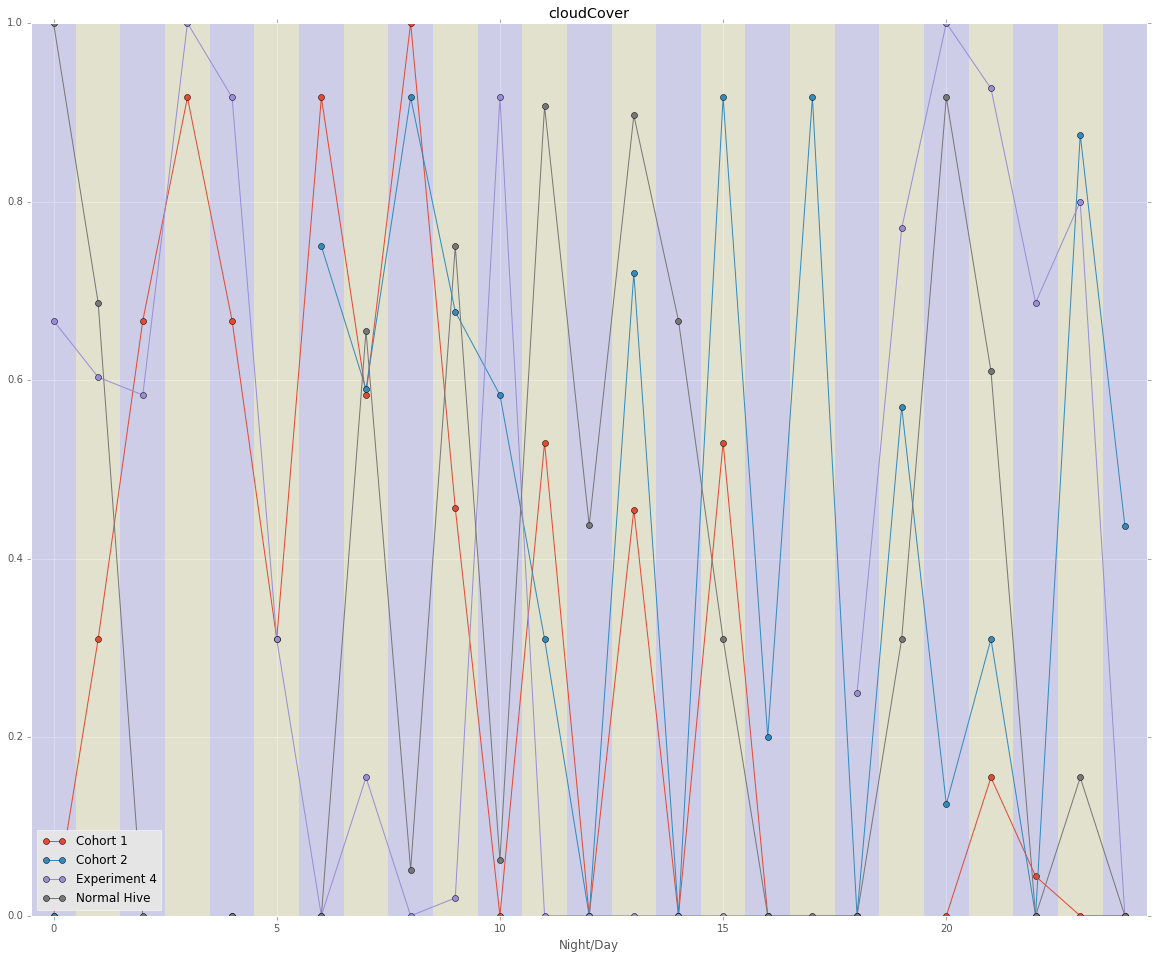

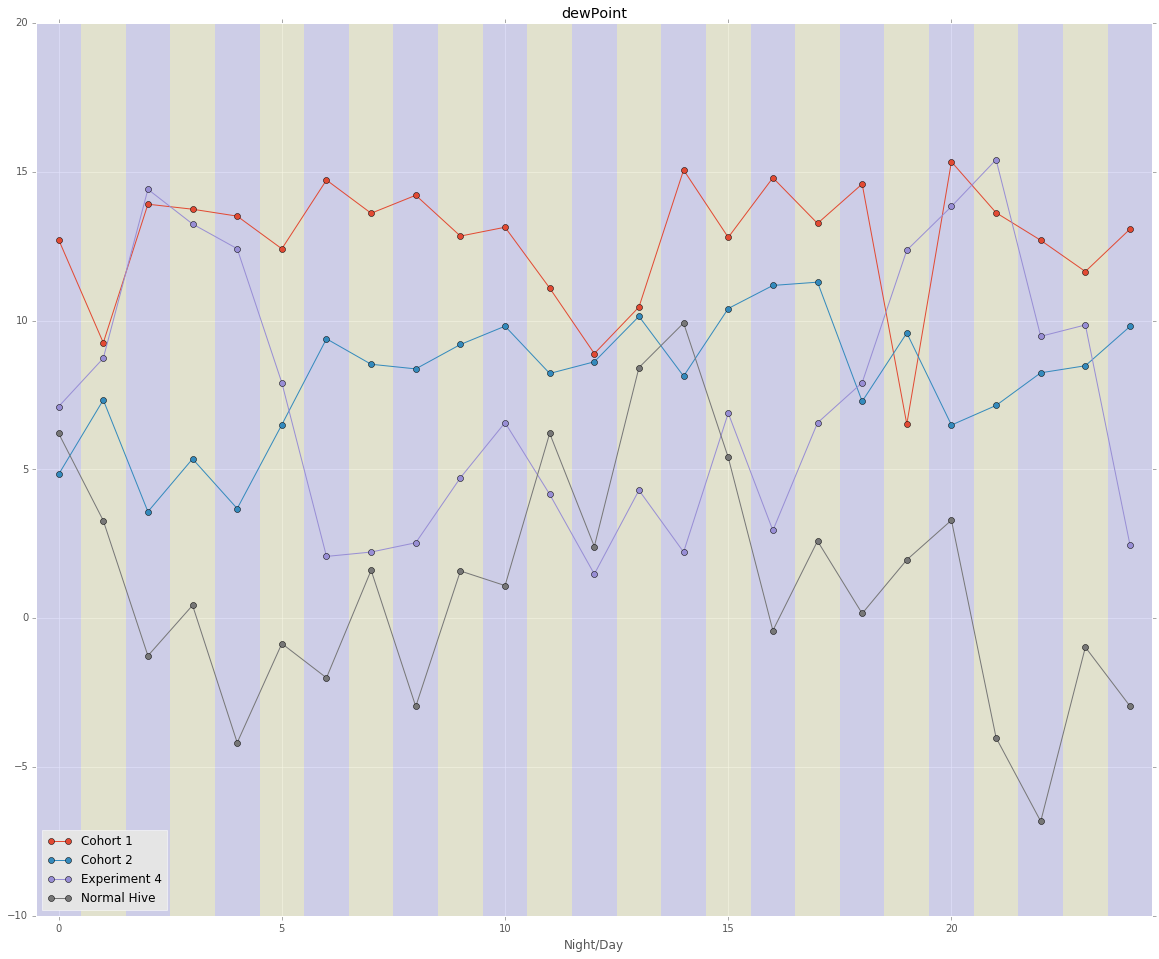

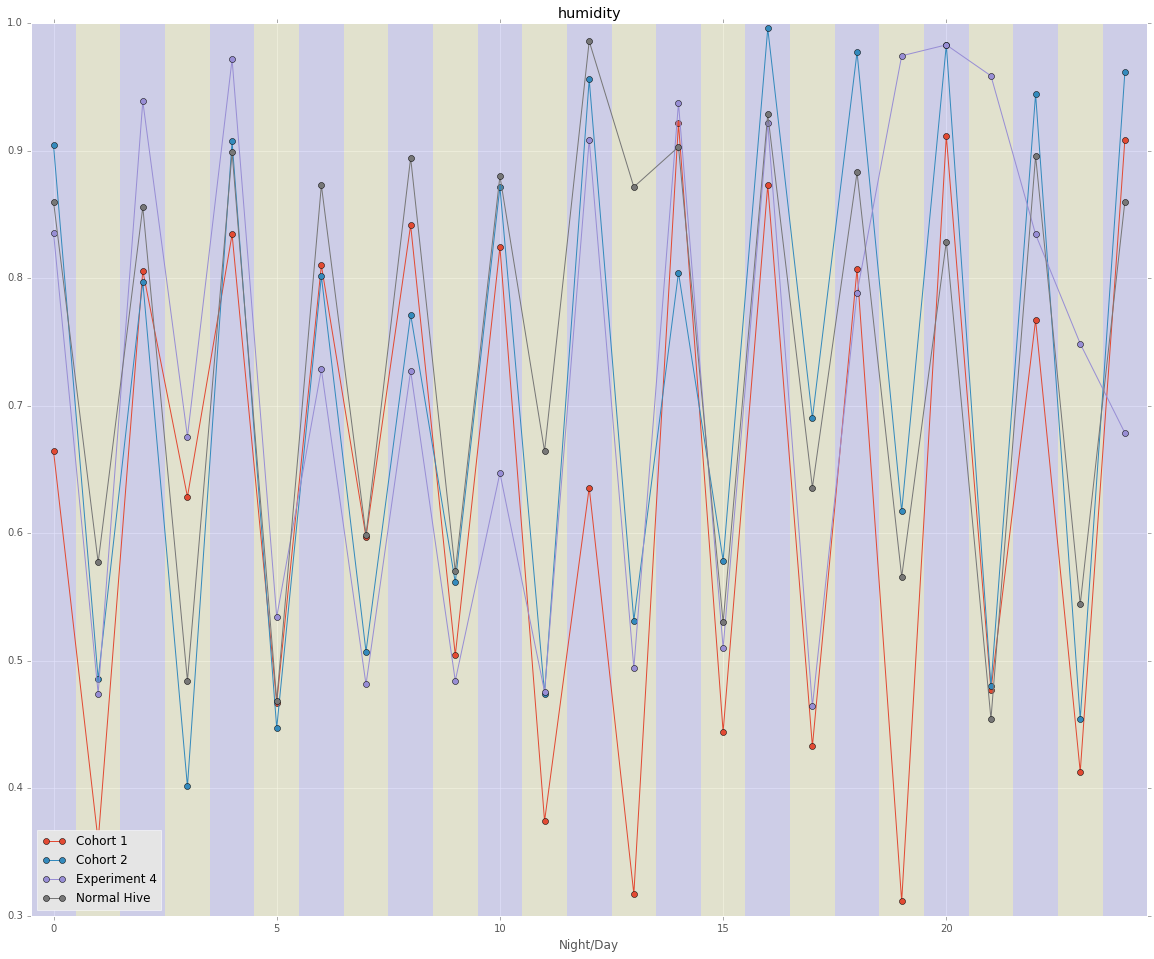

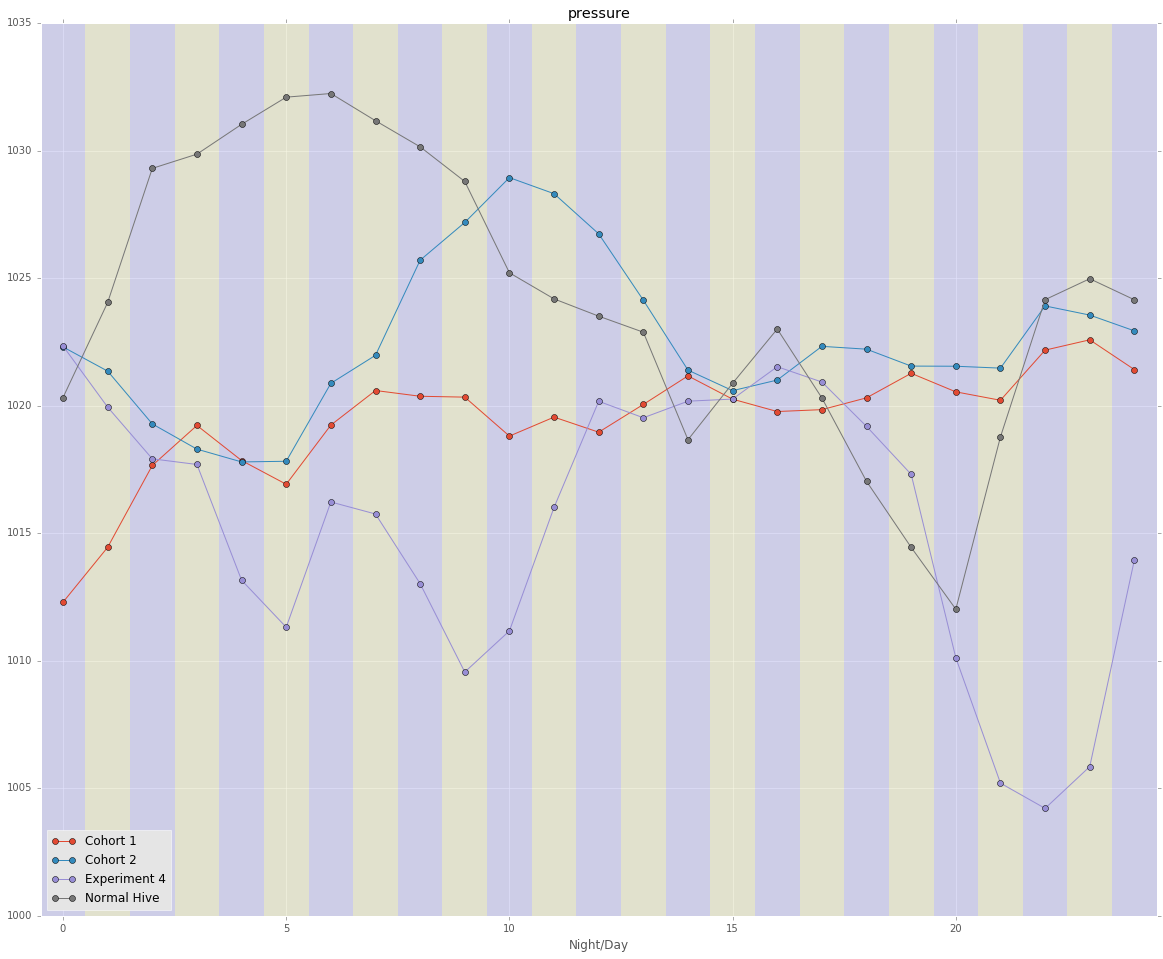

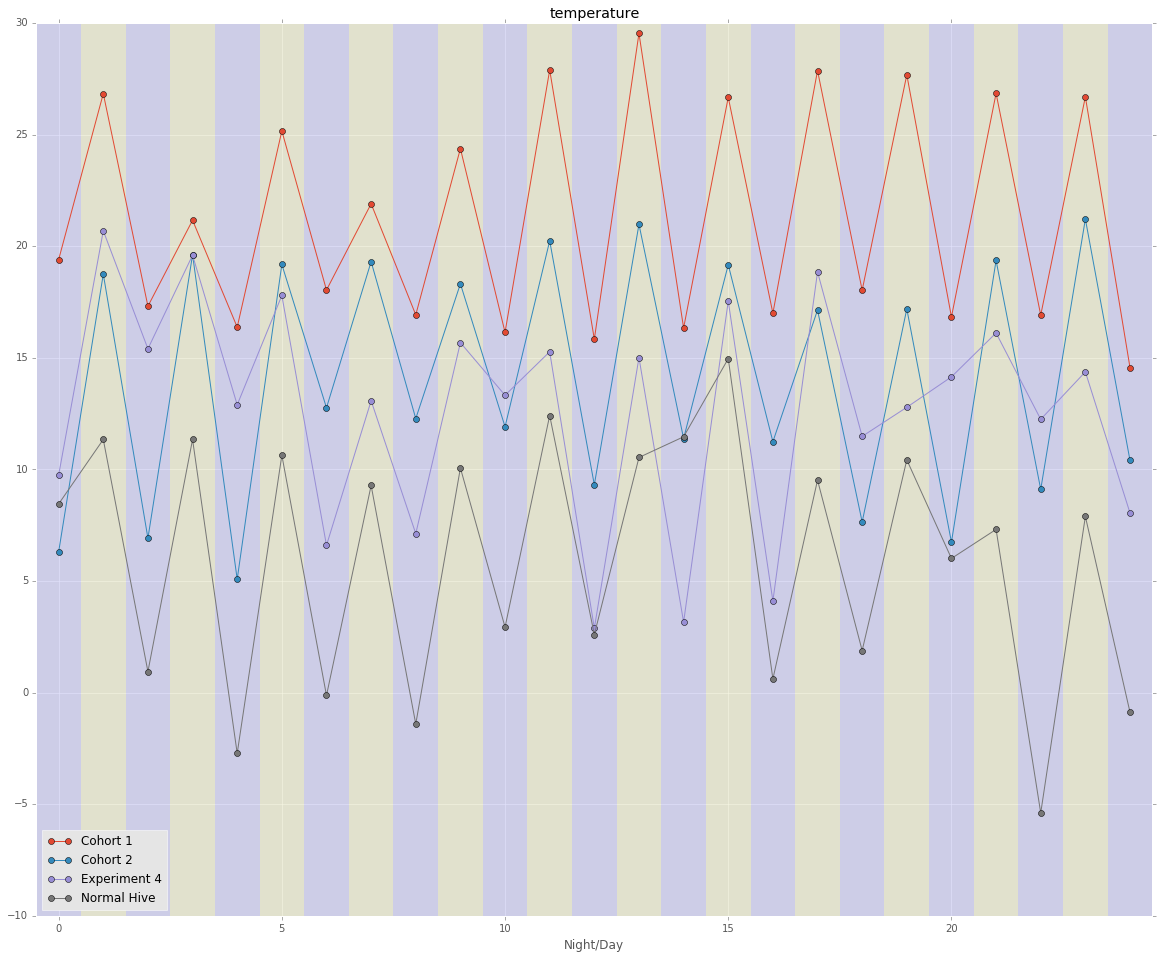

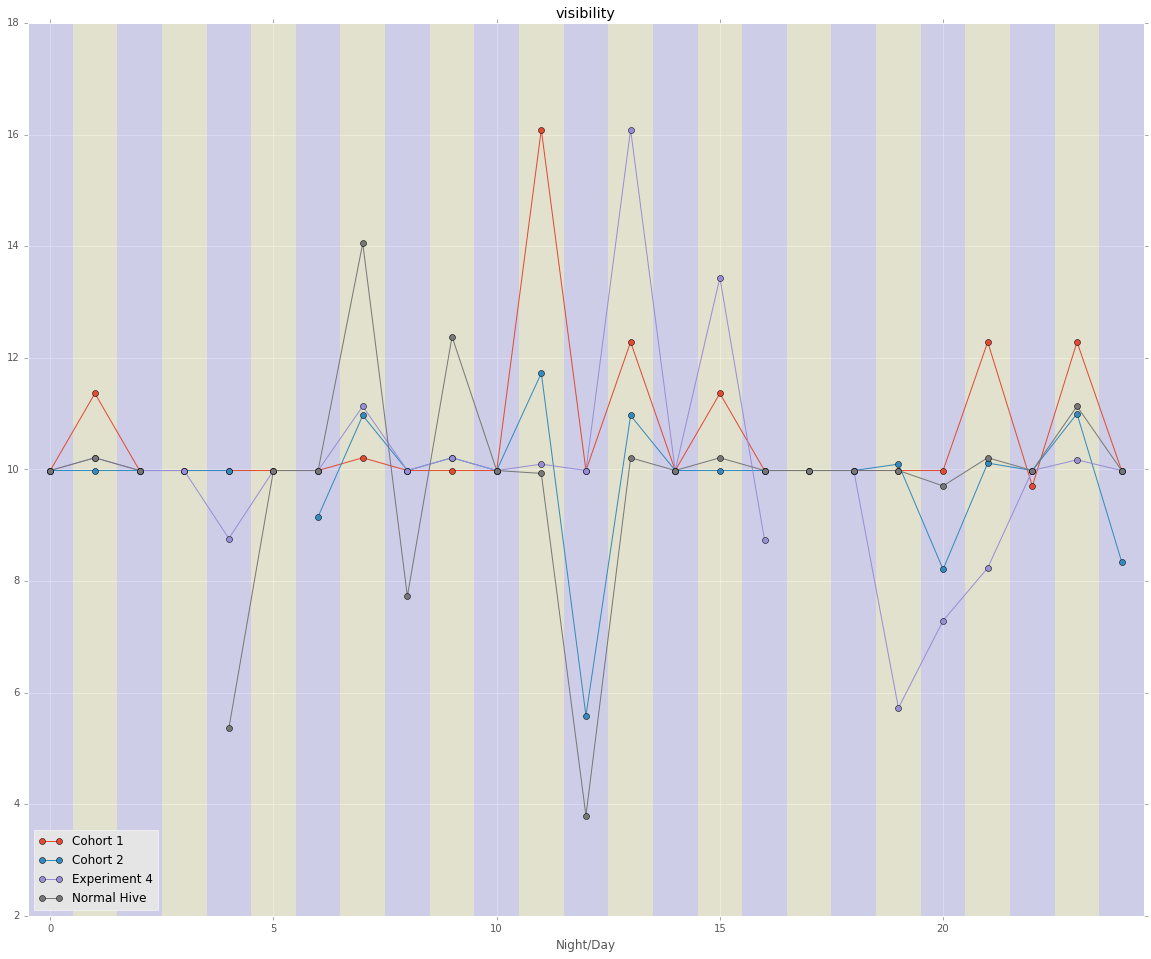

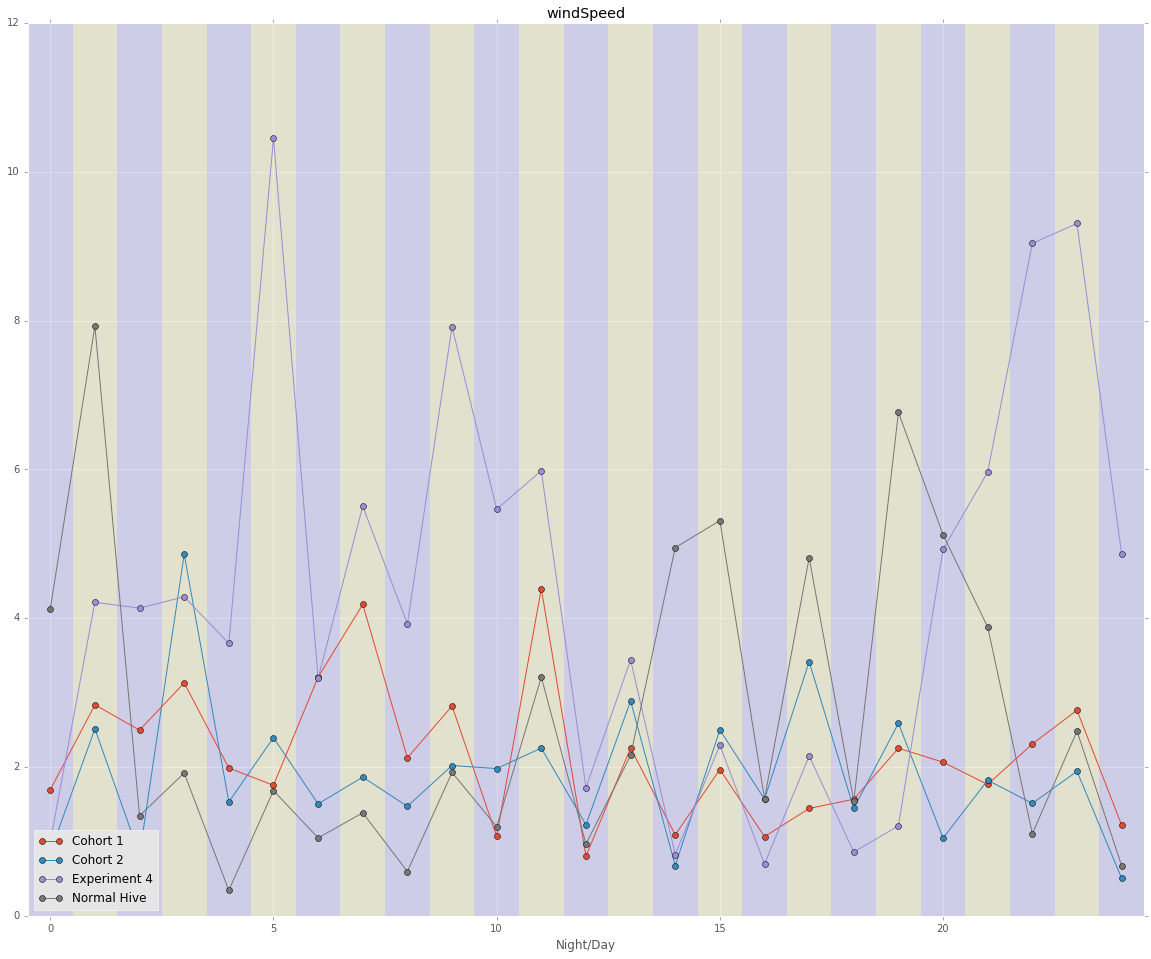

In [32]:
for metric in metrics:

    for i, df in enumerate(weather_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metric)
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(weather_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

In [34]:
experiment_files = ['../results/2_output.csv', '../results/3_output.csv', '../results/4_output.csv', '../results/1_output.csv']

experiment_df_list = []
for file in experiment_files:
    df = pd.read_csv(file, comment='#', header = 0)
    experiment_df_list.append(df)

print(experiment_df_list[0].dtypes)
print(experiment_df_list[0]['result_type'].unique())

real_result_df_list = []
for df in experiment_df_list:
    real_df = df[(df['result_type'] == 'real') & (df['tag_type'] == 'All')].reset_index()
    real_result_df_list.append(real_df)

day_num                                  int64
diff_mean_all_tracked_speeds           float64
diff_mean_min_tracked_speeds           float64
diff_median_all_tracked_speeds         float64
diff_median_min_tracked_speeds         float64
diff_spread_all_tracked_all_xy         float64
diff_spread_all_tracked_individuals    float64
diff_spread_min_tracked_all_xy         float64
diff_spread_min_tracked_individuals    float64
mean_all_tracked_speeds                float64
mean_min_tracked_speeds                float64
median_all_tracked_speeds              float64
median_min_tracked_speeds              float64
result_type                             object
spread_all_tracked_all_xy              float64
spread_all_tracked_individuals         float64
spread_min_tracked_all_xy              float64
spread_min_tracked_individuals         float64
tag_type                                object
time_period                             object
dtype: object
['real']


In [35]:
real_result_df_list[0].head()

index  day_num  diff_mean_all_tracked_speeds  diff_mean_min_tracked_speeds  \
0      8        0                      3.727570                      3.732812   
1      9        0                           NaN                           NaN   
2     18        1                      0.031370                      0.034699   
3     19        1                           NaN                           NaN   
4     28        2                      1.294042                      1.279400   

   diff_median_all_tracked_speeds  diff_median_min_tracked_speeds  \
0                        3.911097                        3.911097   
1                             NaN                             NaN   
2                        0.037521                        0.042318   
3                             NaN                             NaN   
4                        0.685316                        0.694592   

   diff_spread_all_tracked_all_xy  diff_spread_all_tracked_individuals  \
0                        0.865246                             1.072089   
1                             NaN                                  NaN   
2                        0.977143                             0.842084   
3                             NaN                                  NaN   
4                        0.744163                             0.206532   

   diff_spread_min_tracked_all_xy  diff_spread_min_tracked_individuals  \
0                        0.862737                             1.055480   
1                             NaN                                  NaN   
2                        0.972497                             0.788955   
3                             NaN                                  NaN   
4                        0.746035                             0.199220   

      ...      mean_min_tracked_speeds  median_all_tracked_speeds  \
0     ...                     7.873158                   3.605551   
1     ...                    11.605970                   7.516648   
2     ...                    11.629456                   7.826238   
3     ...                    11.664155                   7.788717   
4     ...                    10.885291                   7.245044   

   median_min_tracked_speeds  result_type spread_all_tracked_all_xy  \
0                   3.605551         real                 10.184953   
1                   7.516648         real                  9.319706   
2                   7.826238         real                 10.127591   
3                   7.783920         real                 11.104734   
4                   7.211103         real                 11.333139   

   spread_all_tracked_individuals  spread_min_tracked_all_xy  \
0                       10.469189                  10.174605   
1                        9.397101                   9.311868   
2                       10.040519                  10.124454   
3                       10.882603                  11.096950   
4                       11.174720                  11.323622   

   spread_min_tracked_individuals  tag_type time_period  
0                       10.311756       All       night  
1                        9.256276       All         day  
2                        9.976552       All       night  
3                       10.765507       All         day  
4                       11.065927       All       night  

[5 rows x 21 columns]

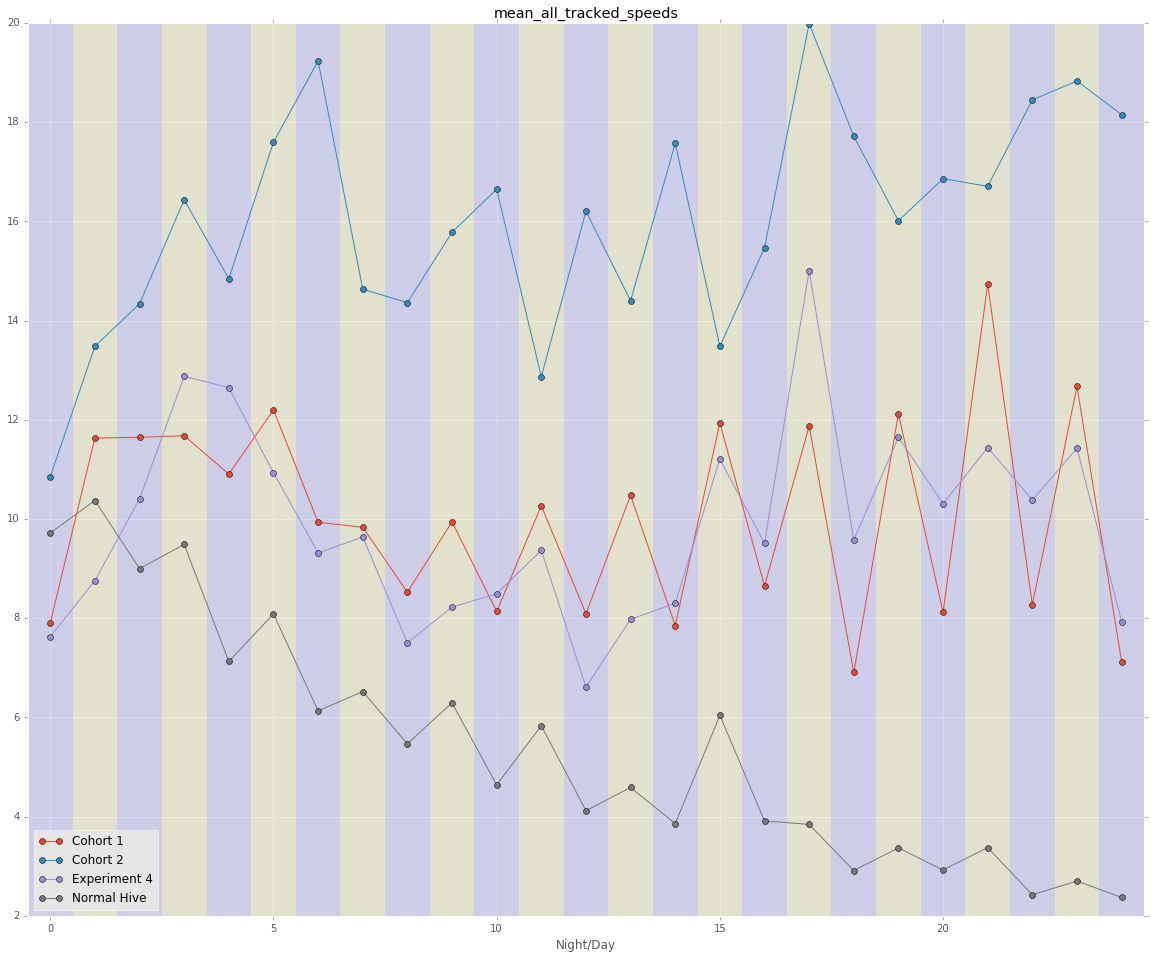

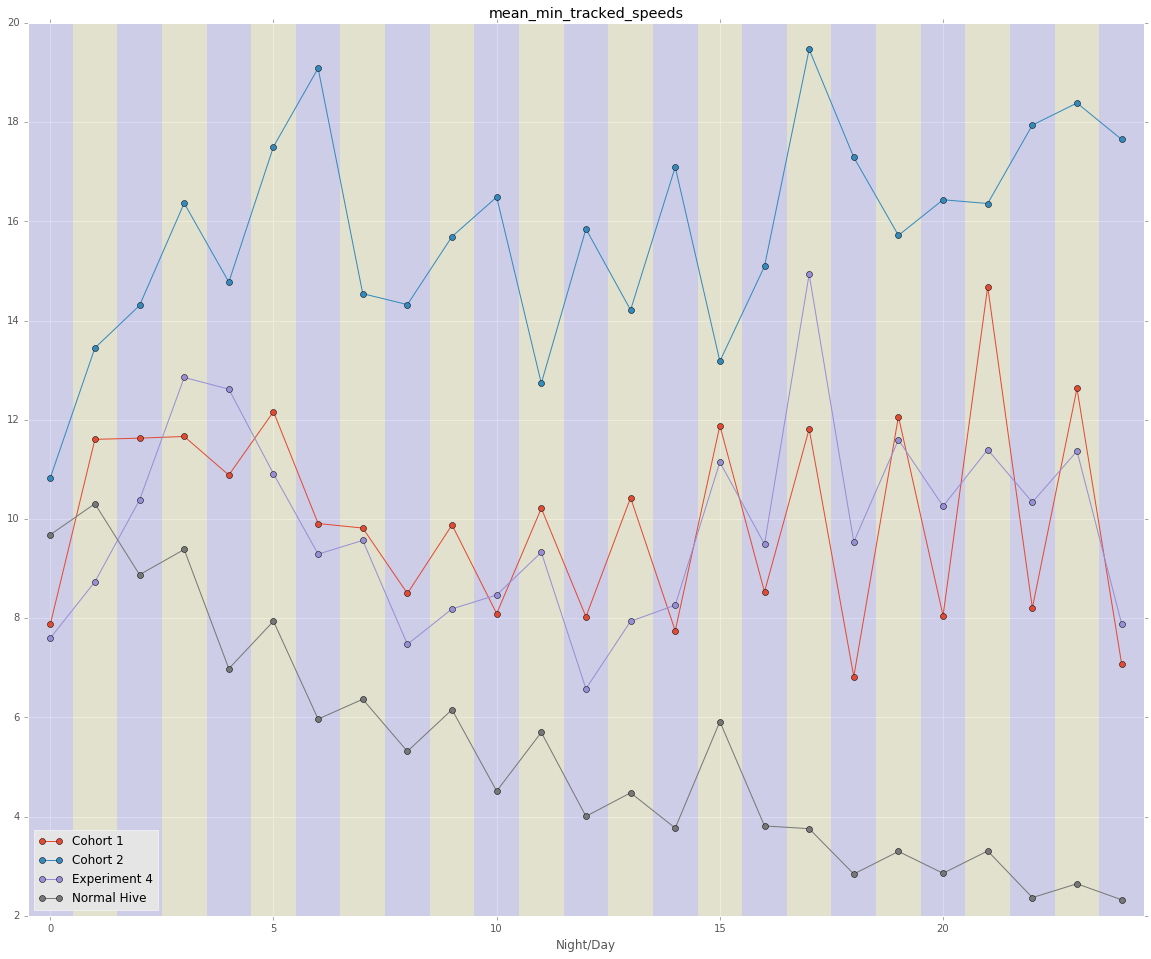

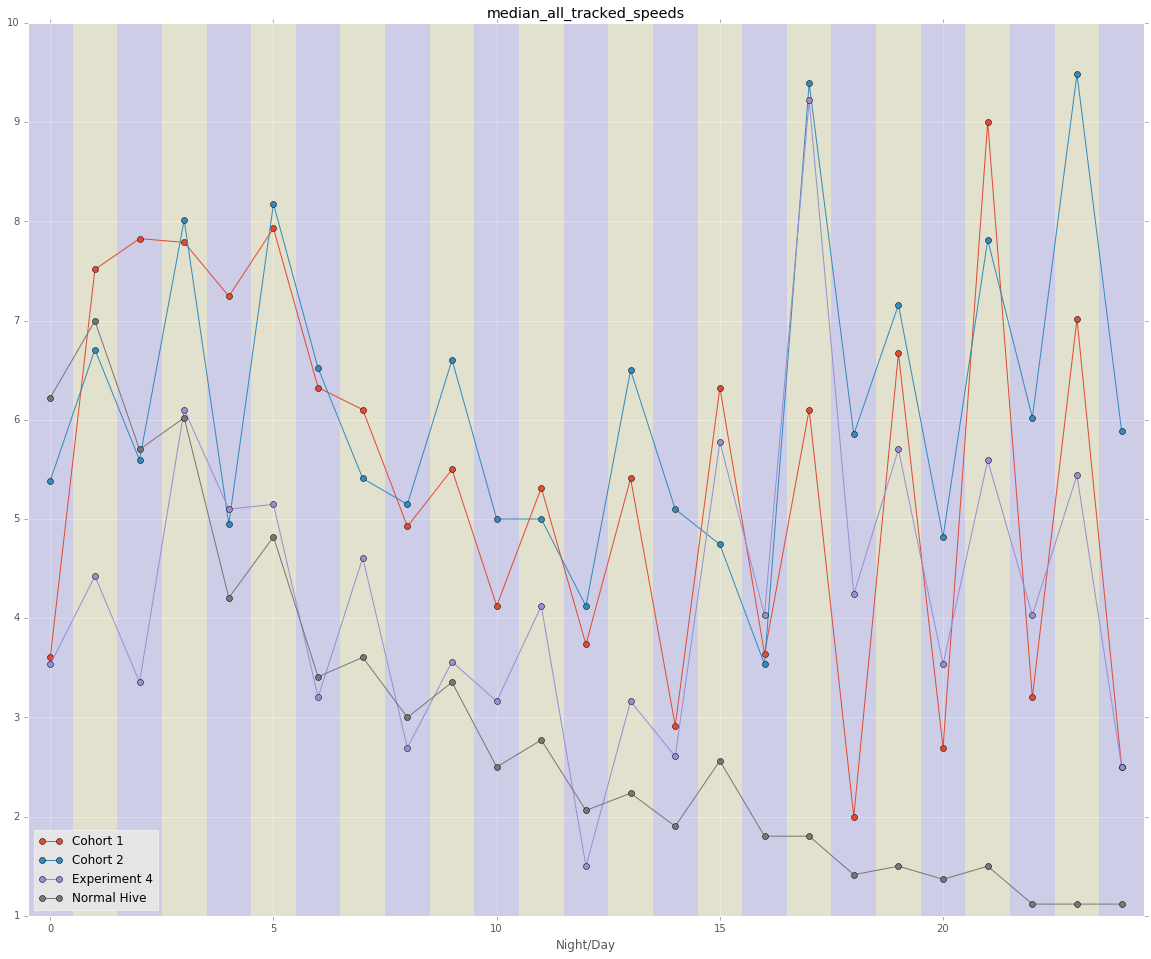

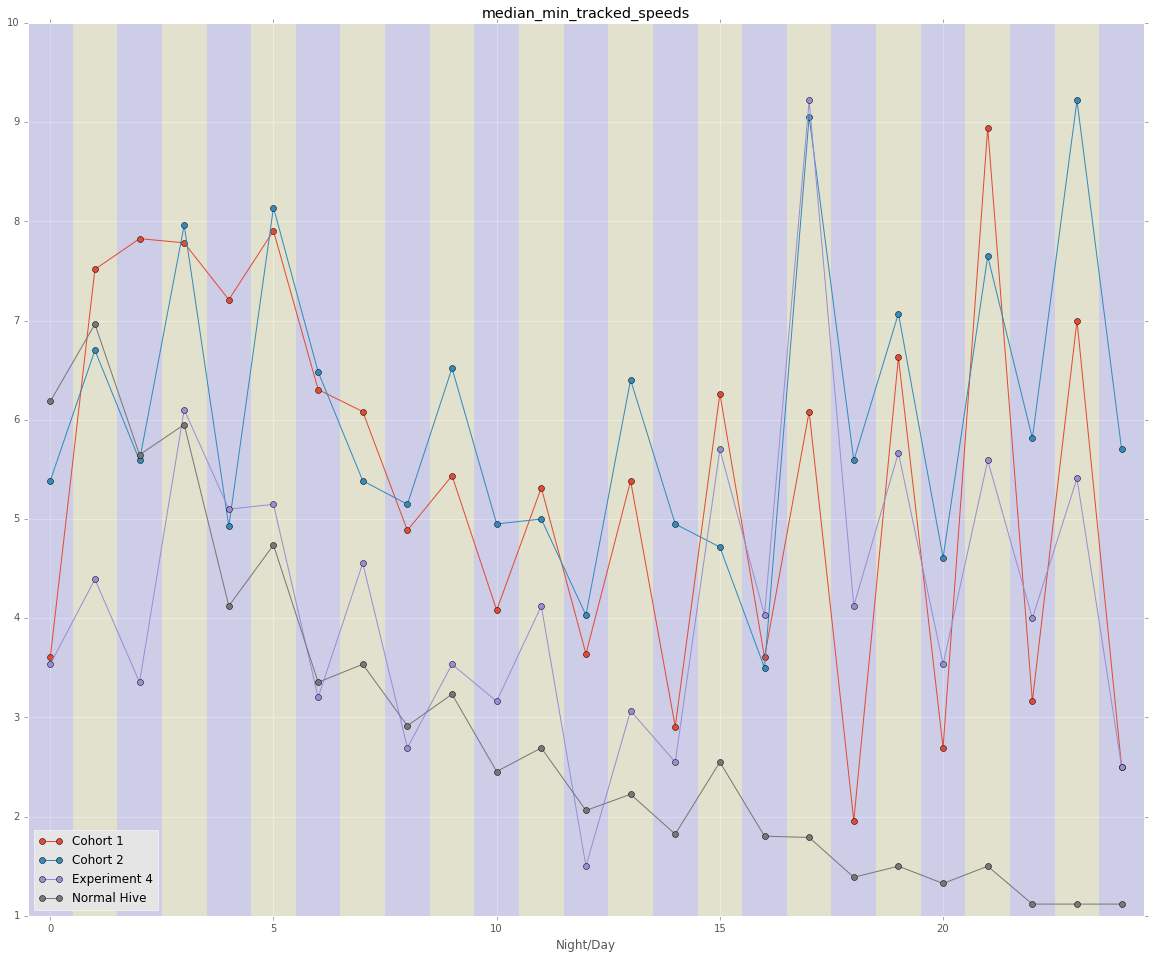

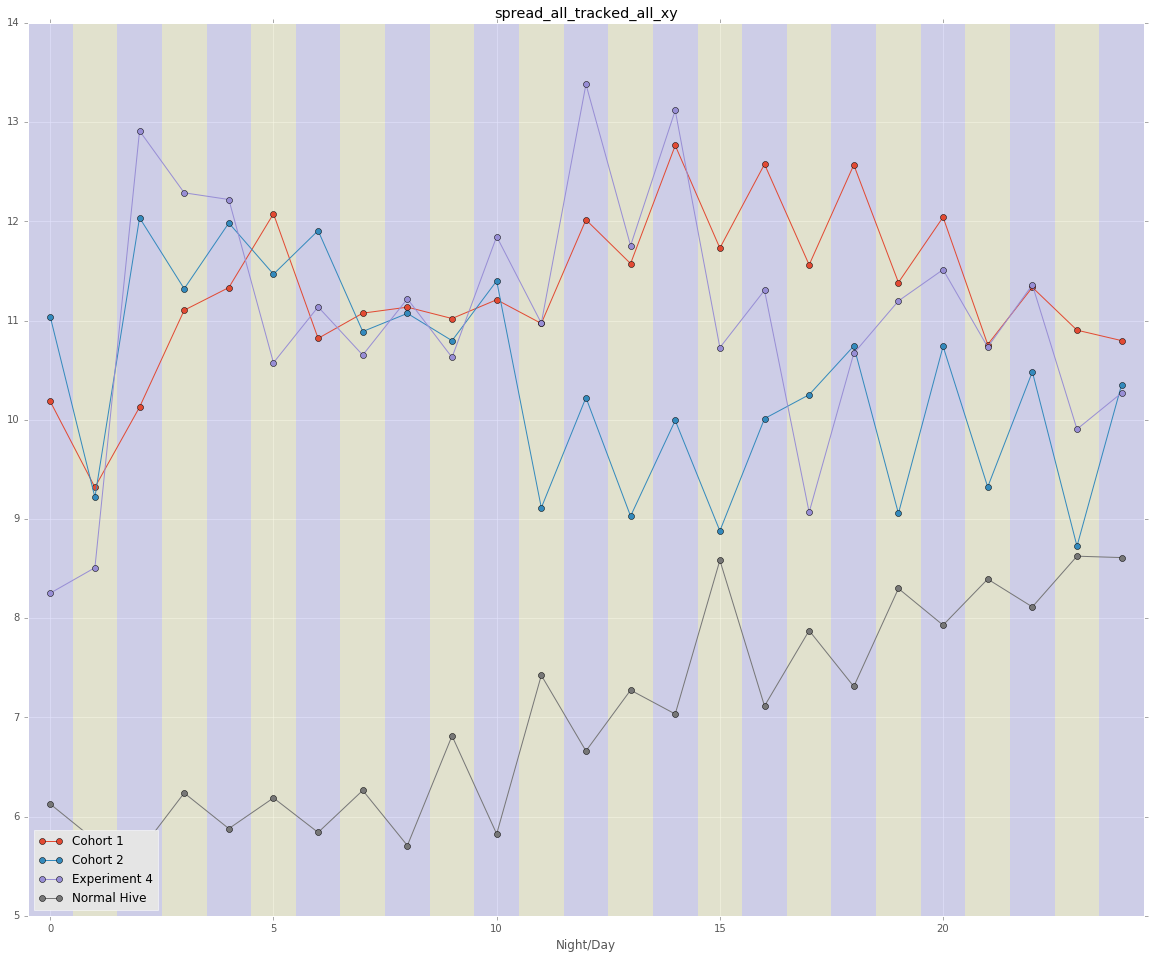

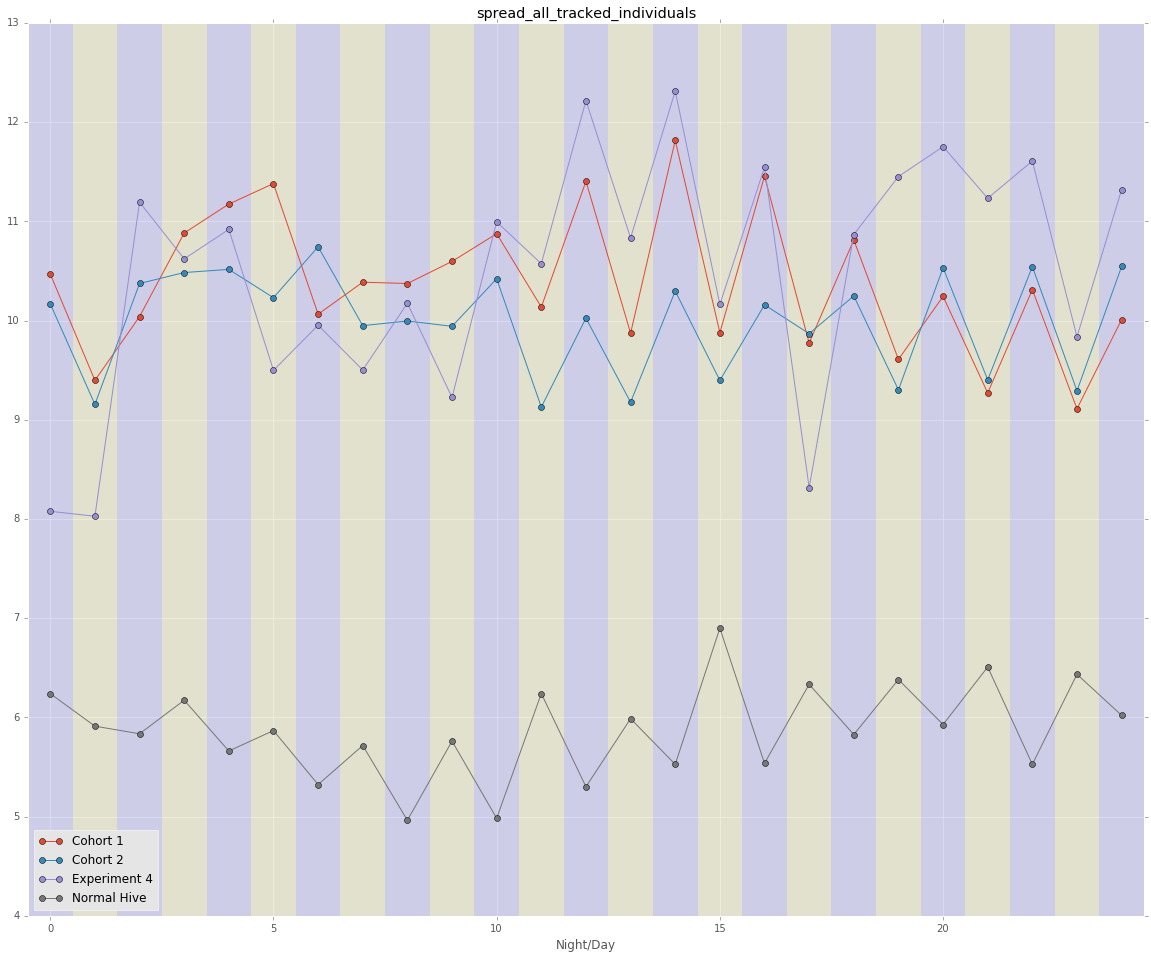

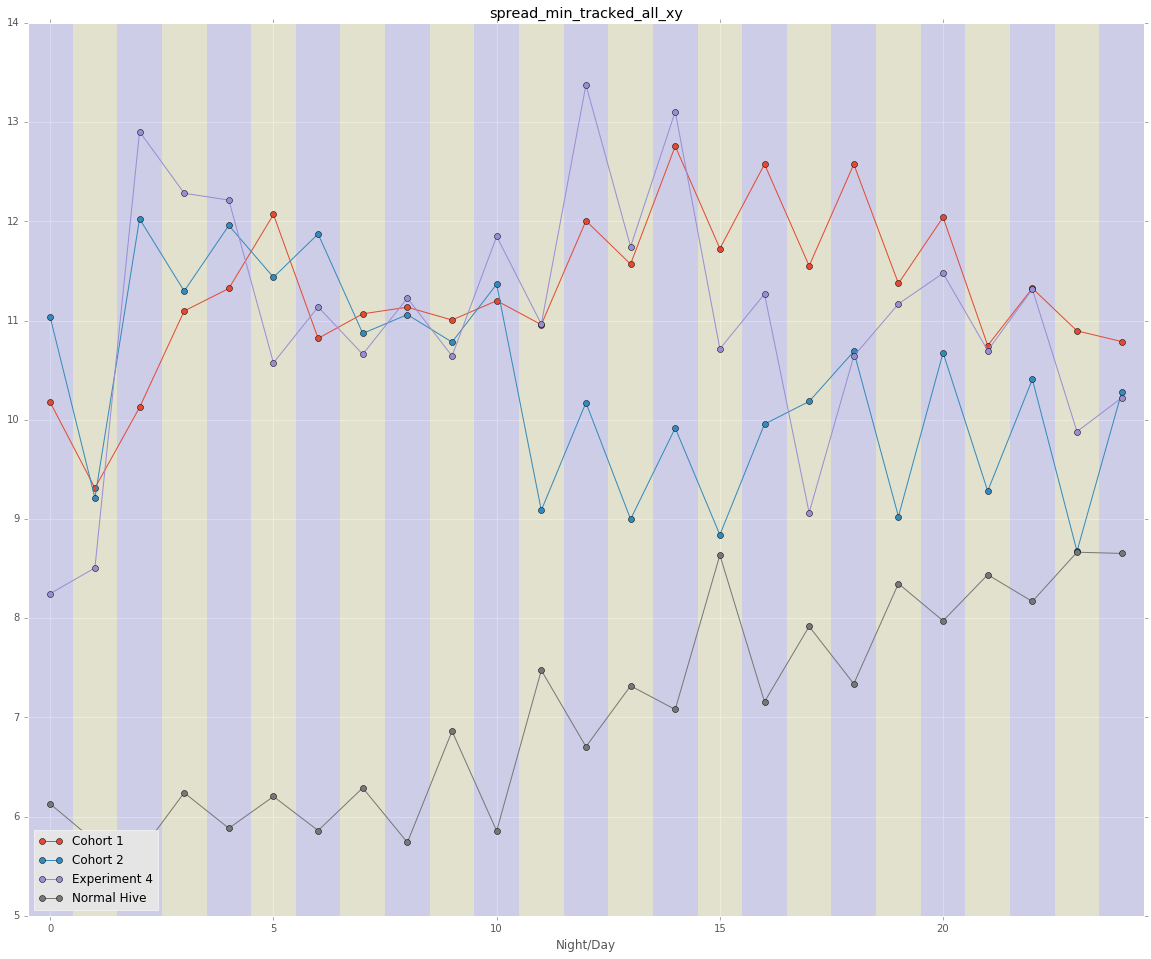

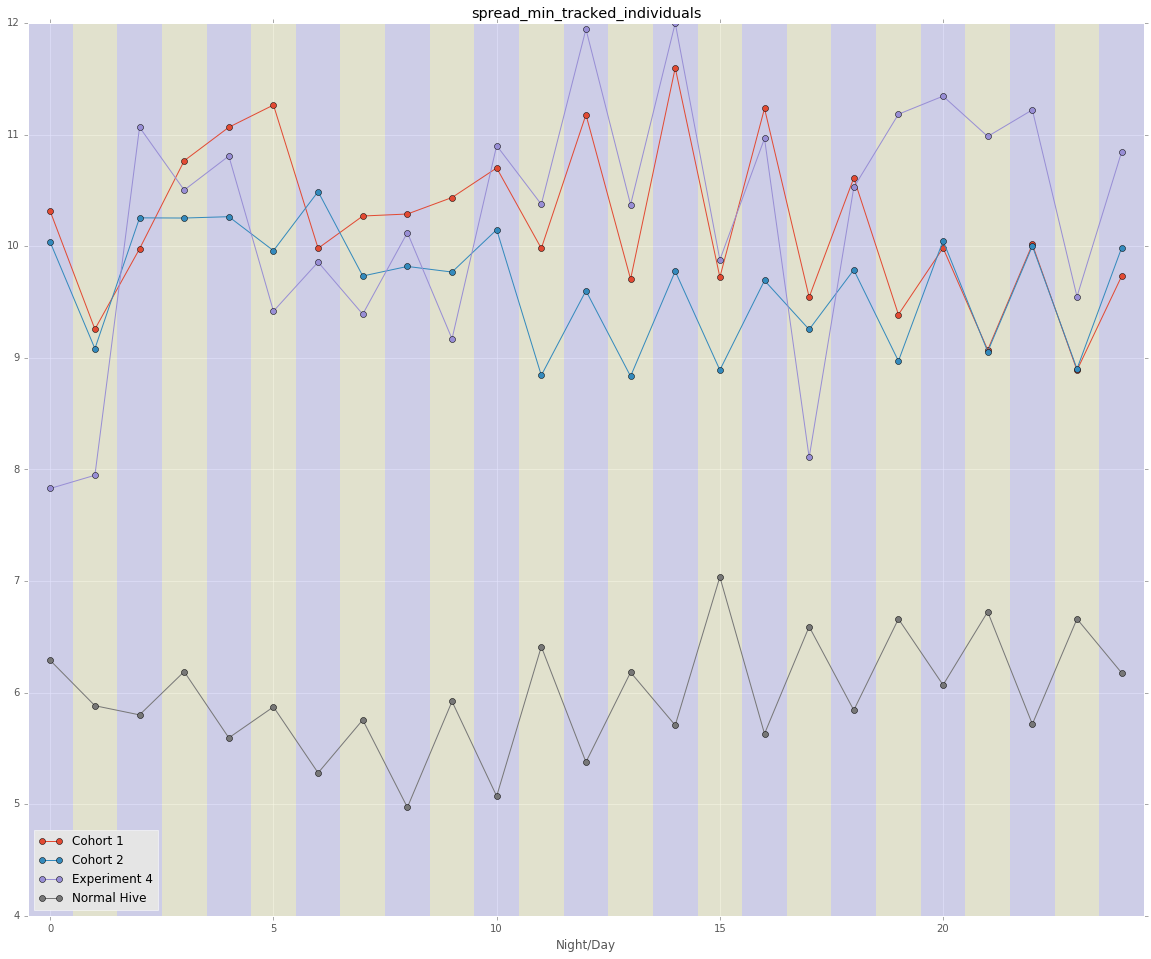

In [39]:
extended_metrics = ['mean_all_tracked_speeds', 'mean_min_tracked_speeds', 'median_all_tracked_speeds', 'median_min_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_all_tracked_individuals', 'spread_min_tracked_all_xy', 'spread_min_tracked_individuals']

for metric in extended_metrics:

    for i, df in enumerate(real_result_df_list):
        plt.plot(df[metric][0:25], marker='o', label='{}'.format(hive_names[i]))
    plt.title(metric)
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='lower left')

    for j, time_period in enumerate(real_result_df_list[0]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

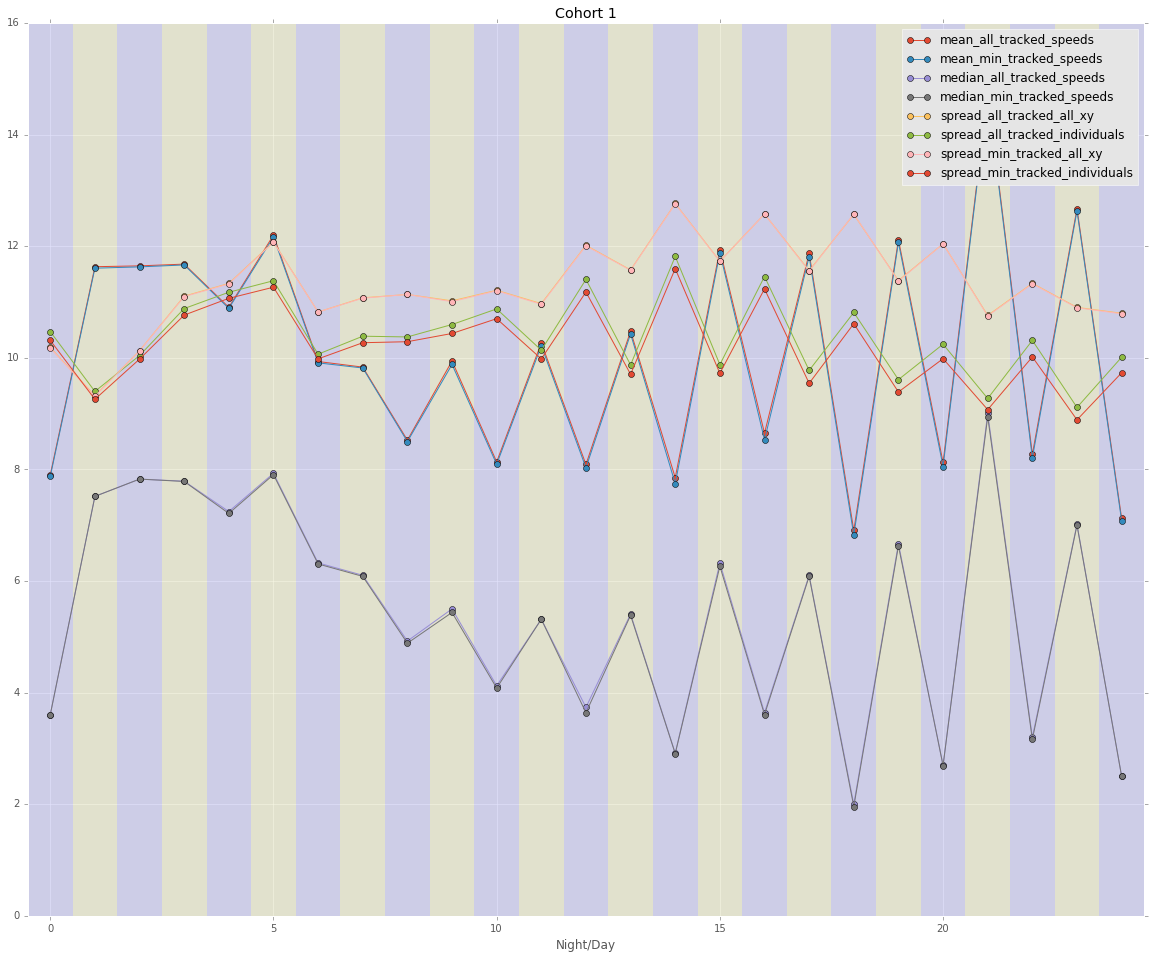

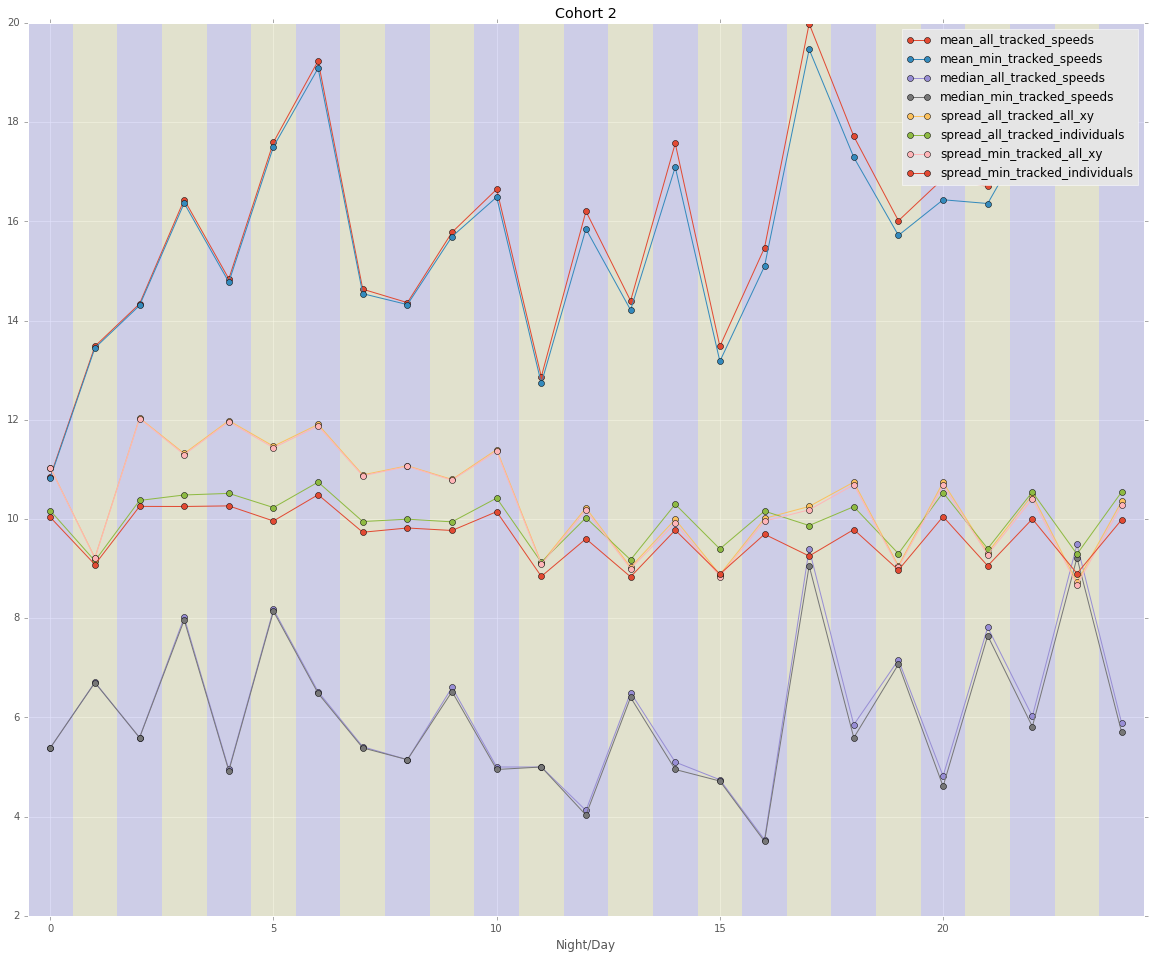

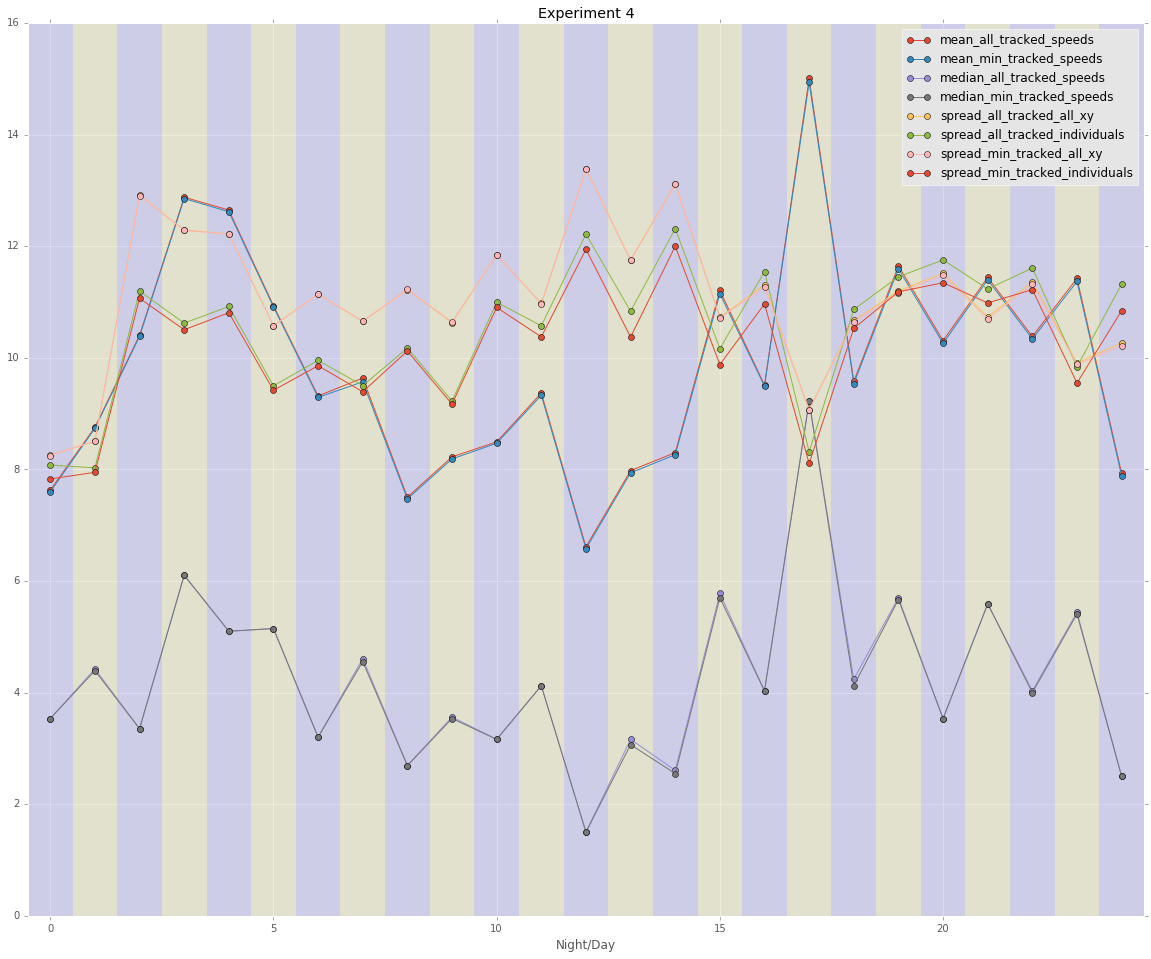

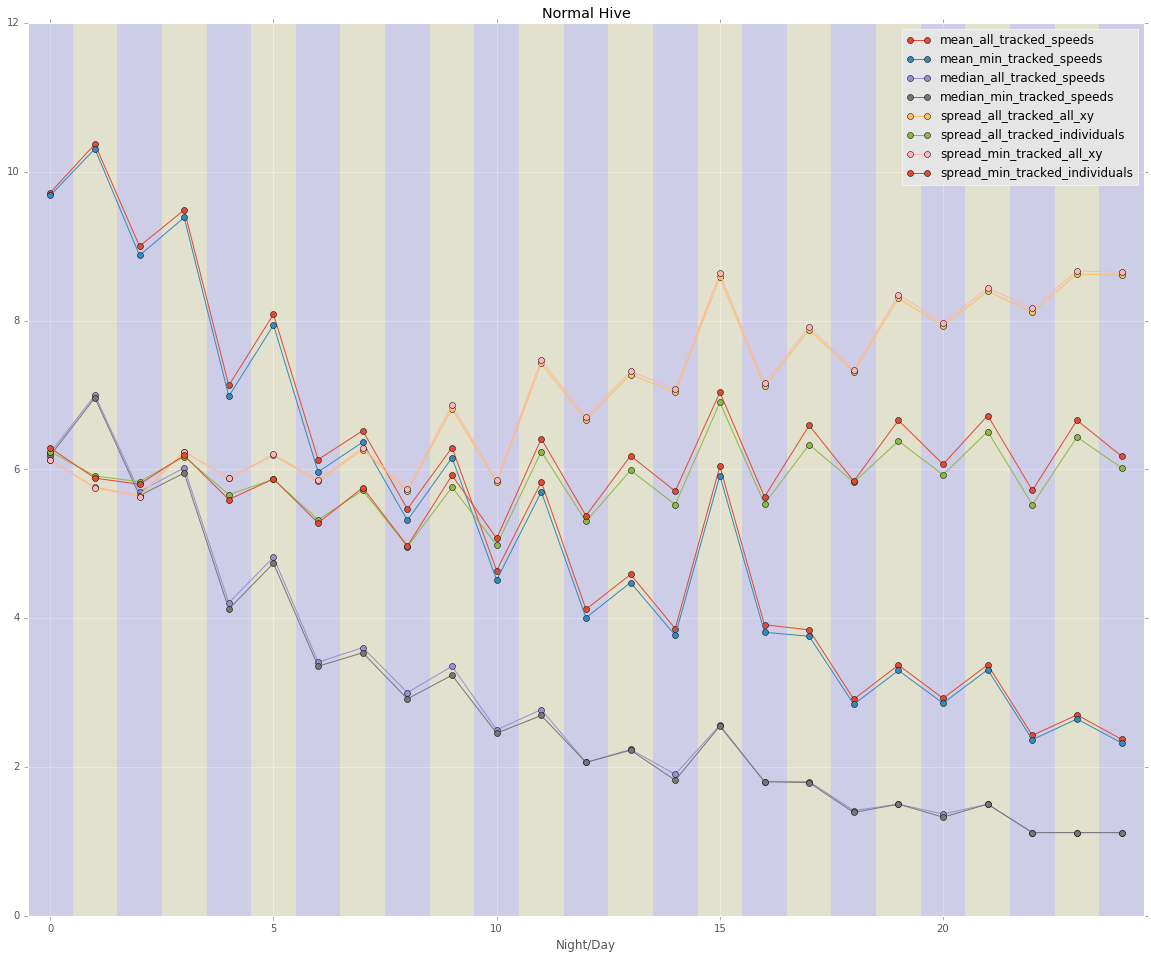

In [40]:
for i, df in enumerate(real_result_df_list):
    plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='mean_all_tracked_speeds')
    plt.plot(df['mean_min_tracked_speeds'][0:25], marker='o', label='mean_min_tracked_speeds')
    plt.plot(df['median_all_tracked_speeds'][0:25], marker='o', label='median_all_tracked_speeds')
    plt.plot(df['median_min_tracked_speeds'][0:25], marker='o', label='median_min_tracked_speeds')
    plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    plt.plot(df['spread_all_tracked_individuals'][0:25], marker='o', label='spread_all_tracked_individuals')
    plt.plot(df['spread_min_tracked_all_xy'][0:25], marker='o', label='spread_min_tracked_all_xy')
    plt.plot(df['spread_min_tracked_individuals'][0:25], marker='o', label='spread_min_tracked_individuals')
    
    plt.title(hive_names[i])
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')

    for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()

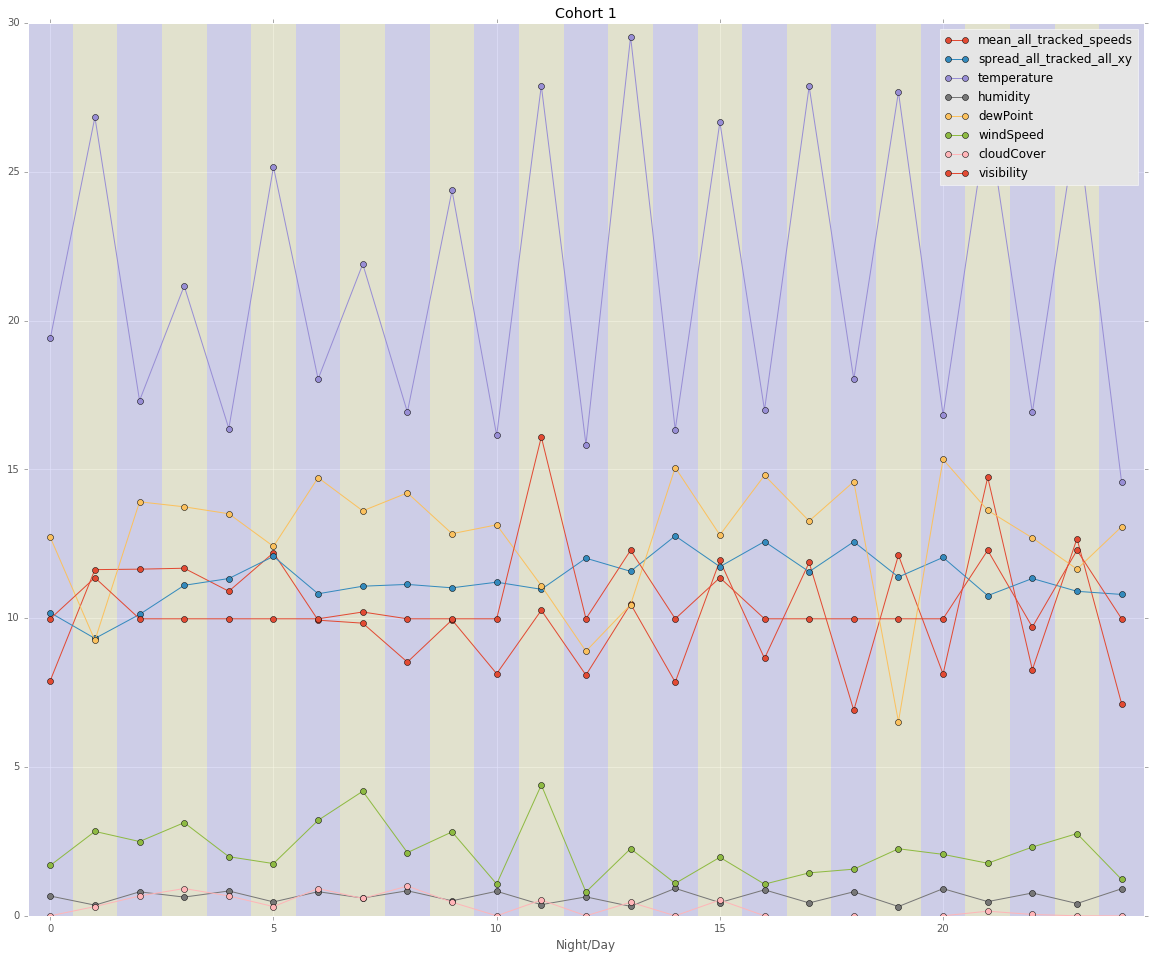

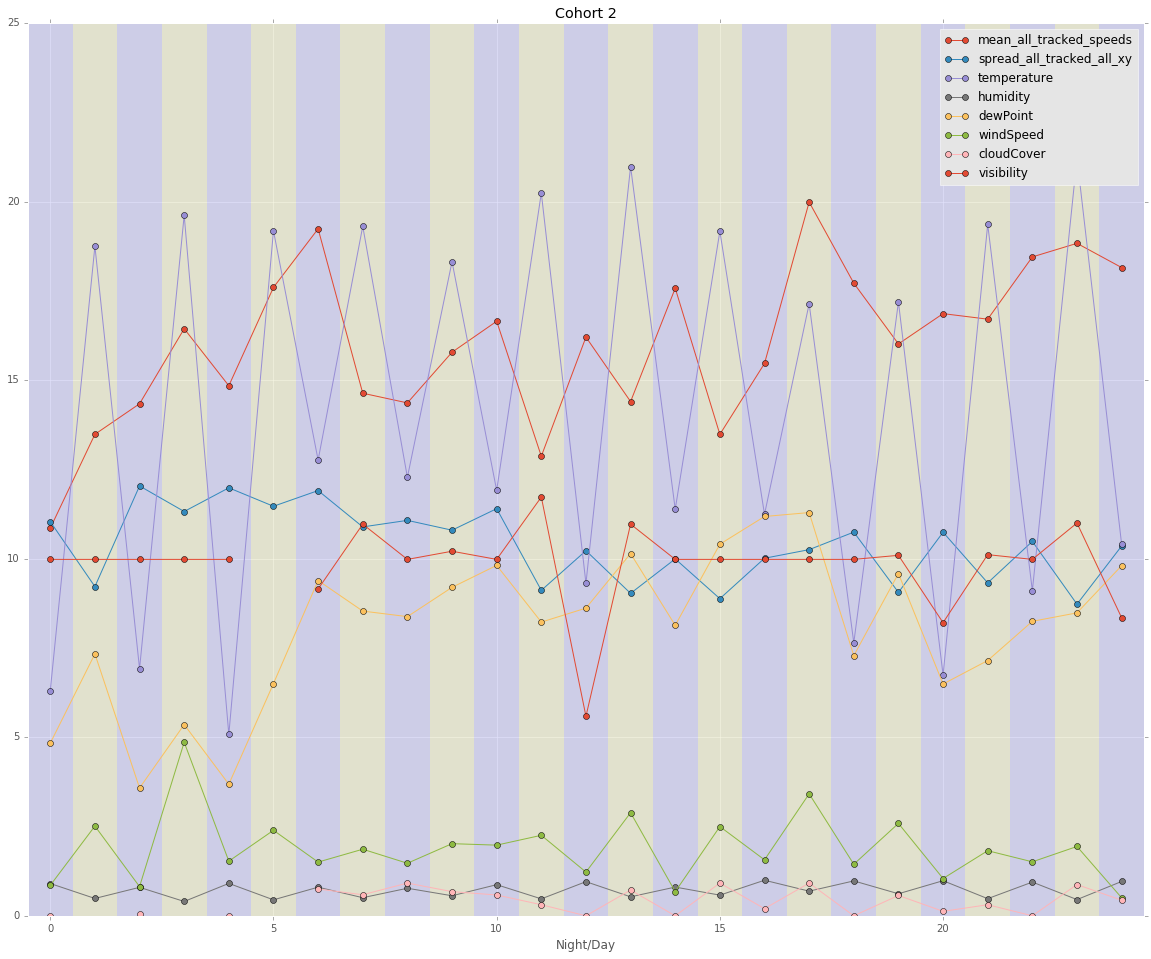

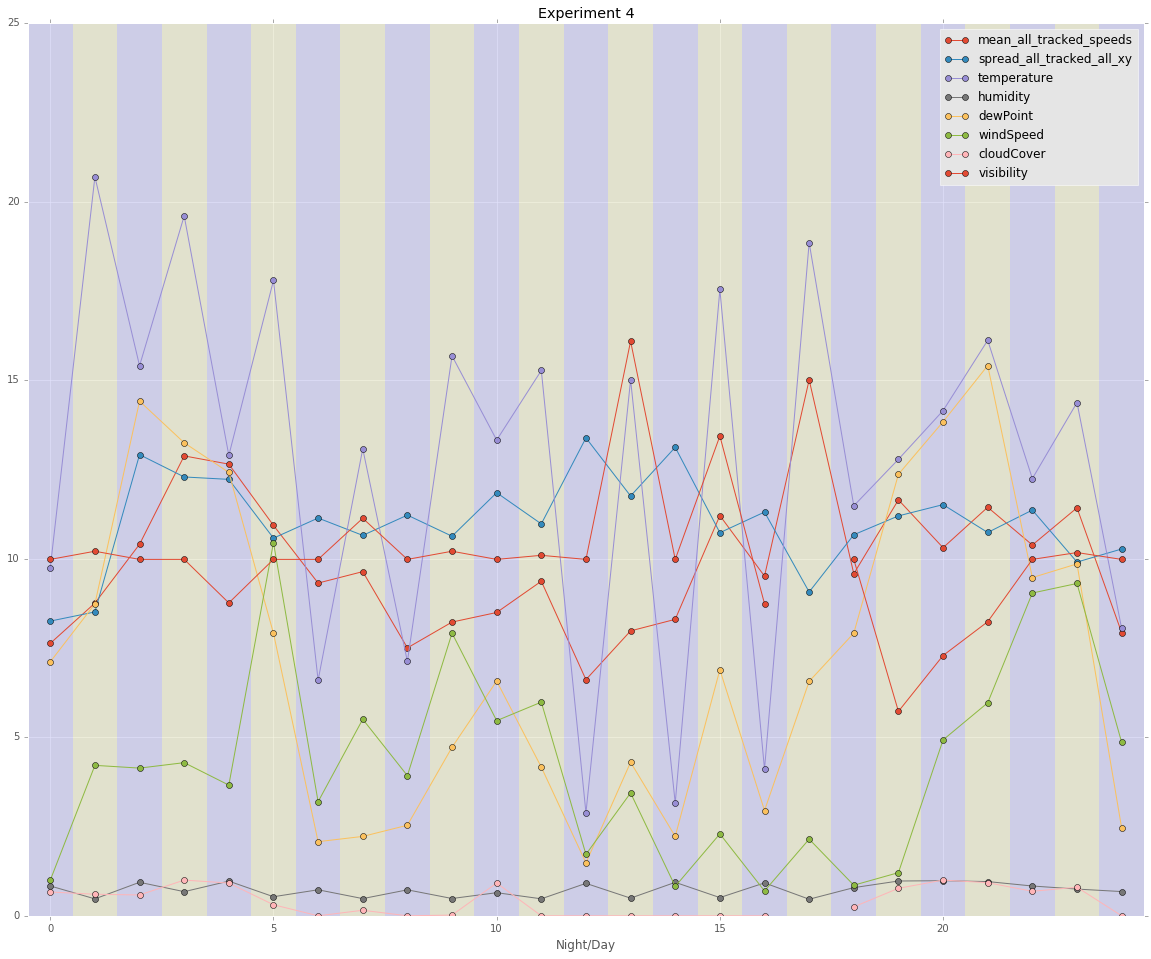

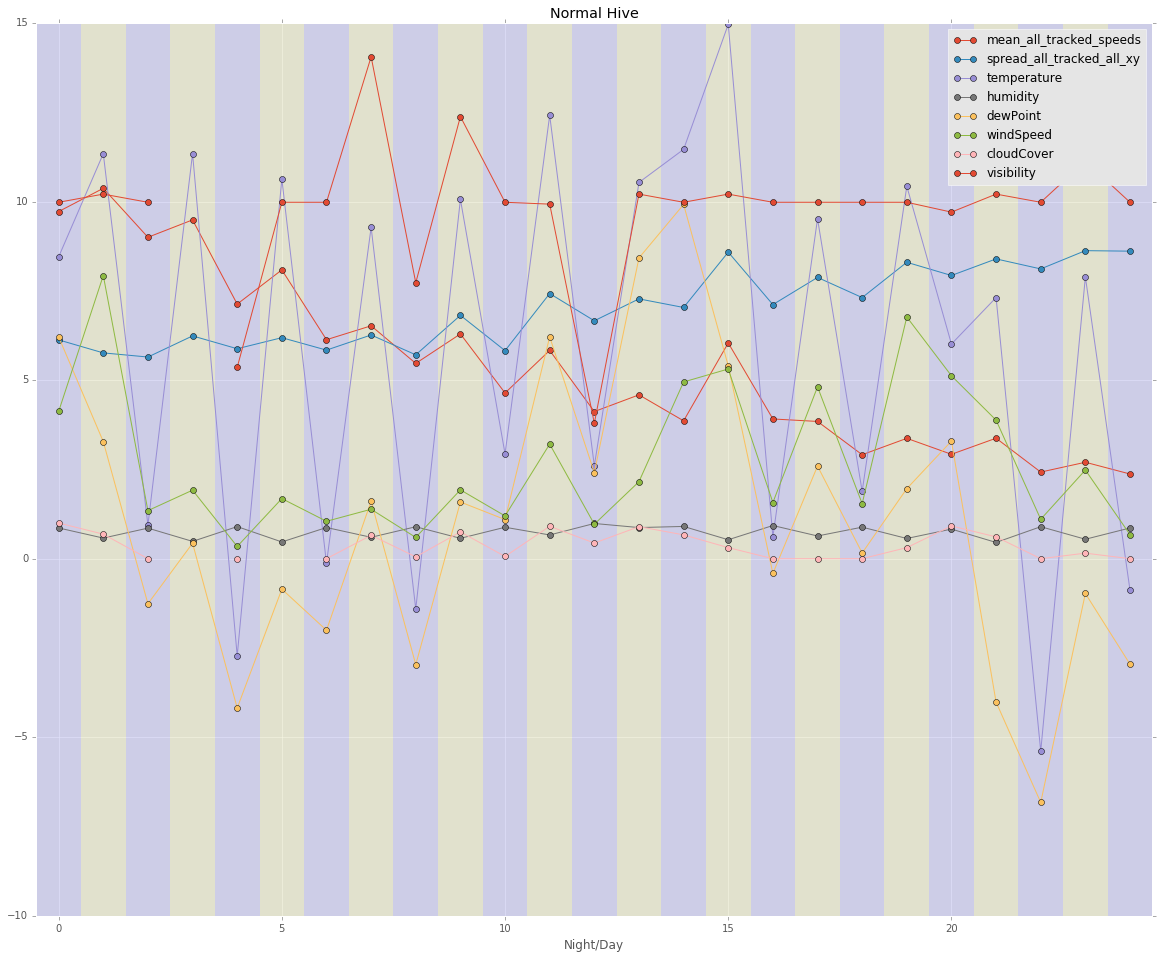

In [41]:
#extended_metrics = ['mean_all_tracked_speeds', 'mean_min_tracked_speeds', 'median_all_tracked_speeds', 'median_min_tracked_speeds', 'spread_all_tracked_all_xy', 'spread_all_tracked_individuals', 'spread_min_tracked_all_xy', 'spread_min_tracked_individuals']

for i, df in enumerate(real_result_df_list):
    plt.plot(df['mean_all_tracked_speeds'][0:25], marker='o', label='mean_all_tracked_speeds')
    plt.plot(df['spread_all_tracked_all_xy'][0:25], marker='o', label='spread_all_tracked_all_xy')
    
    plt.plot(weather_df_list[i]['temperature'][0:25], marker='o', label='temperature')
    plt.plot(weather_df_list[i]['humidity'][0:25], marker='o', label='humidity')
    plt.plot(weather_df_list[i]['dewPoint'][0:25], marker='o', label='dewPoint')
    plt.plot(weather_df_list[i]['windSpeed'][0:25], marker='o', label='windSpeed')
    plt.plot(weather_df_list[i]['cloudCover'][0:25], marker='o', label='cloudCover')
    plt.plot(weather_df_list[i]['visibility'][0:25], marker='o', label='visibility')
    
    plt.title(hive_names[i])
    plt.xlabel('Night/Day')
    plt.xlim(-0.5,24.5)
    plt.legend(loc='upper right')

    for j, time_period in enumerate(weather_df_list[i]['time_period'][0:25]):
        if time_period == 'night':
            plt.axvspan(j - 0.5, j + 0.5, facecolor='b', alpha=0.1, edgecolor='none')
        else:
            plt.axvspan(j - 0.5, j + 0.5, facecolor='y', alpha=0.1, edgecolor='none')
    plt.show()